In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_excel("top goals.xlsx")
df.to_csv("top_goals.csv", index=False)

In [8]:
df.head()

,Season,Rank,Player,Club,Goals,IsTop10,Position,Age,Appearances,Goals_prev_season,Assists,Penalty_Goals,Non-Penalty_Goals,Goals_per_90,Big_6_Club_Feature,Club_League_Rank,Club_Total_Goals,League_Goals_per_Match,Games_in_Season
0,2023-24,1,Erling Haaland,Manchester City,27,1,Forward,23,31,36.0,6.0,1.0,26,0.85,1.0,1,96,2.83,38.0
1,2023-24,2,Cole Palmer,Chelsea,22,1,Attacking Midfielder,22,33,3.0,11.0,9.0,13,0.61,1.0,6,77,2.83,38.0
2,2023-24,3,Alexander Isak,Newcastle United,21,1,Forward,24,30,10.0,2.0,5.0,16,0.76,0.0,7,85,2.83,38.0
3,2023-24,4,Ollie Watkins,Aston Villa,19,1,Forward,28,37,15.0,13.0,0.0,19,0.51,0.0,4,76,2.83,38.0
4,2023-24,4,Dominic Solanke,AFC Bournemouth,19,1,Forward,26,38,6.0,3.0,1.0,18,0.50,0.0,12,54,2.83,38.0


In [10]:
df.columns

Index(['Season', 'Rank', 'Player', 'Club', 'Goals', 'IsTop10', 'Position',
       'Age', 'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals',
       'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature',
       'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match',
       'Games_in_Season'],
      dtype='object')

In [11]:
df.isnull().sum()

Season                      0
Rank                        0
Player                      0
Club                        0
Goals                       0
IsTop10                     0
Position                    0
Age                         0
Appearances                 0
Goals_prev_season         115
Assists                   228
Penalty_Goals               1
Non-Penalty_Goals           0
Goals_per_90                0
Big_6_Club_Feature          0
Club_League_Rank            0
Club_Total_Goals            0
League_Goals_per_Match      0
Games_in_Season             0
dtype: int64

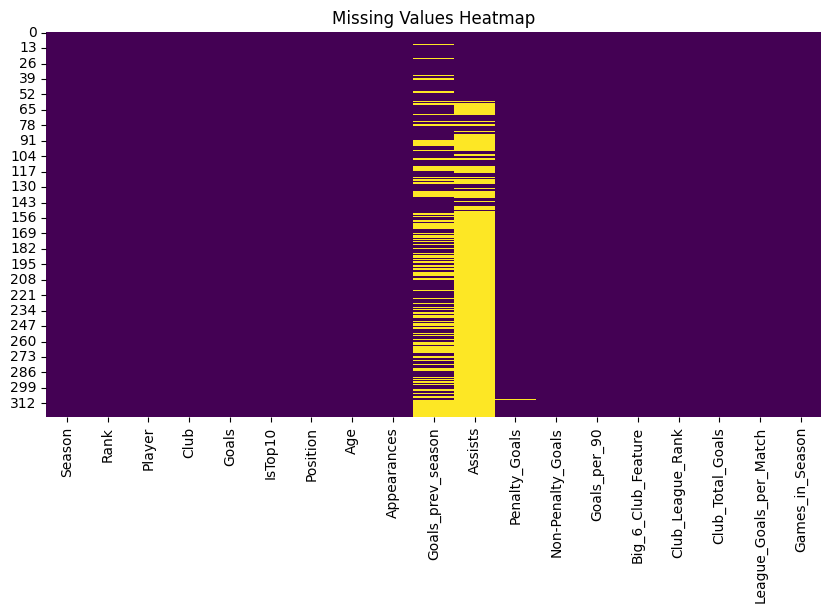

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [15]:
df = df.dropna(subset=['Assists'])

In [16]:
df['Goals_prev_season'] = df['Goals_prev_season'].fillna(df['Goals_prev_season'].median())

In [17]:
df['Penalty_Goals'] = df['Penalty_Goals'].fillna(df['Penalty_Goals'].mode()[0])


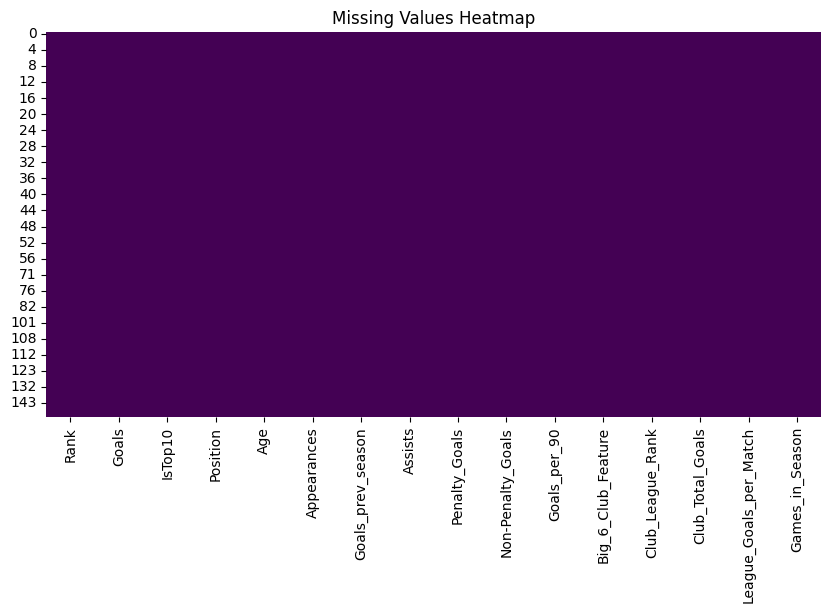

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
unwanted_cols = ['Season', 'Player', 'Club']  
df = df.drop(columns=unwanted_cols, errors='ignore')
df.columns

Index(['Rank', 'Goals', 'IsTop10', 'Position', 'Age', 'Appearances',
       'Goals_prev_season', 'Assists', 'Penalty_Goals', 'Non-Penalty_Goals',
       'Goals_per_90', 'Big_6_Club_Feature', 'Club_League_Rank',
       'Club_Total_Goals', 'League_Goals_per_Match', 'Games_in_Season'],
      dtype='object')

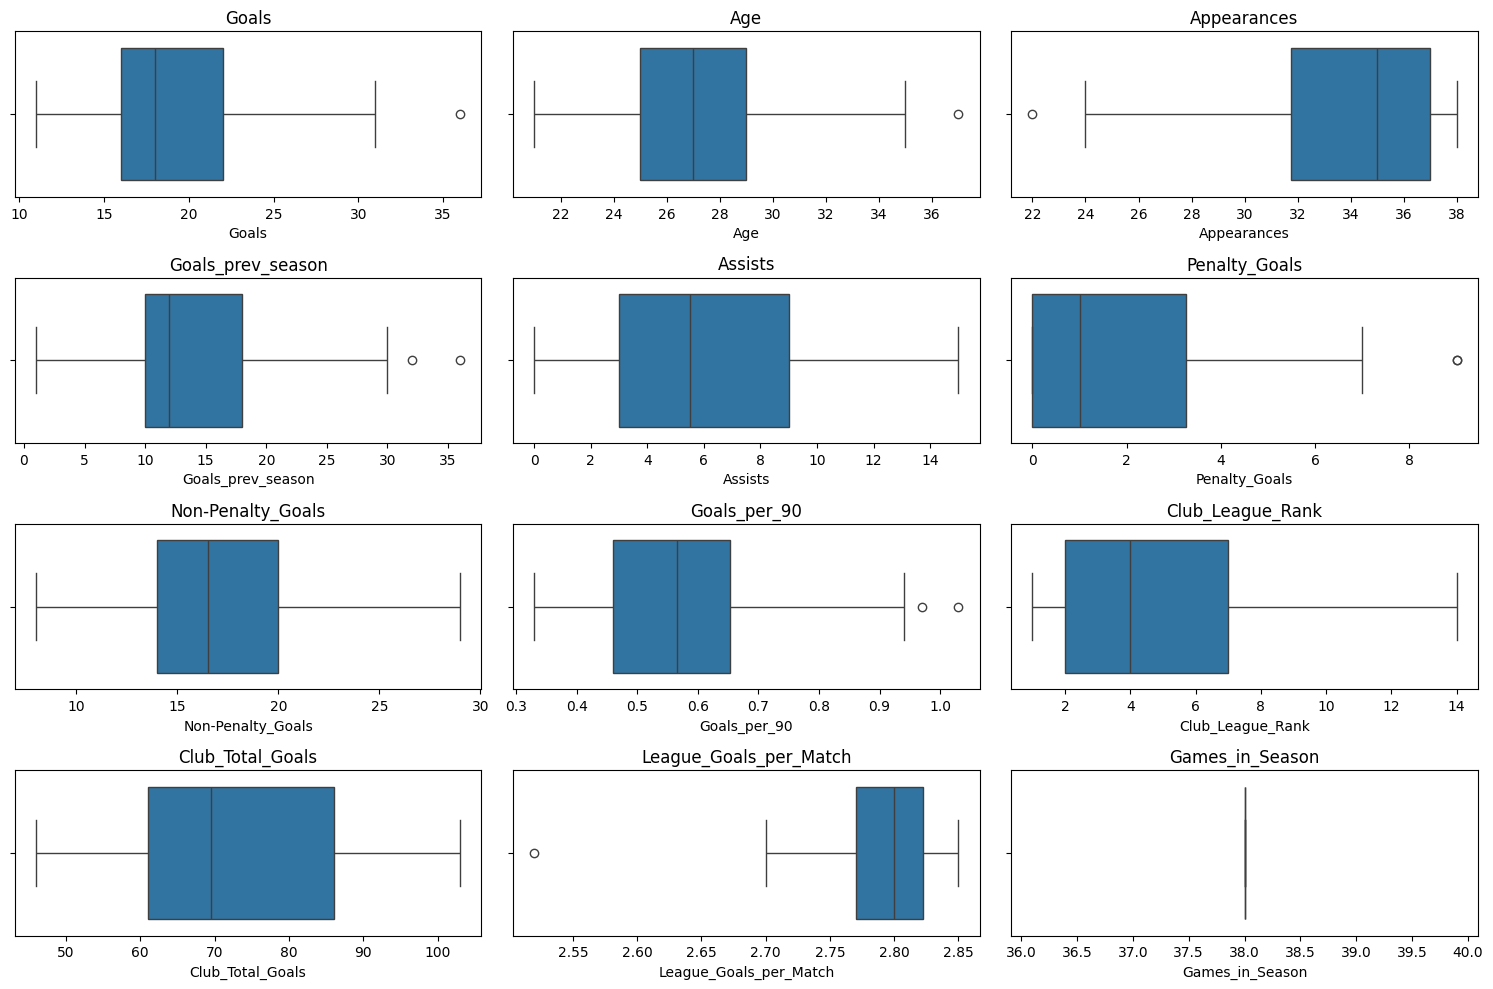

In [19]:
numeric_cols = ['Goals','Age','Appearances','Goals_prev_season',
                'Assists','Penalty_Goals','Non-Penalty_Goals',
                'Goals_per_90','Club_League_Rank','Club_Total_Goals',
                'League_Goals_per_Match','Games_in_Season']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

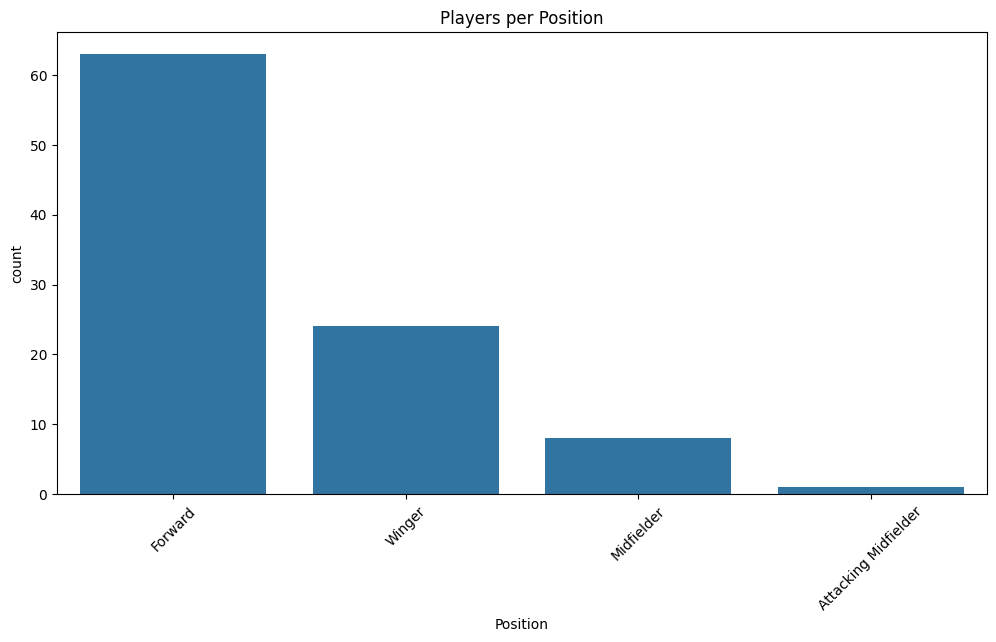

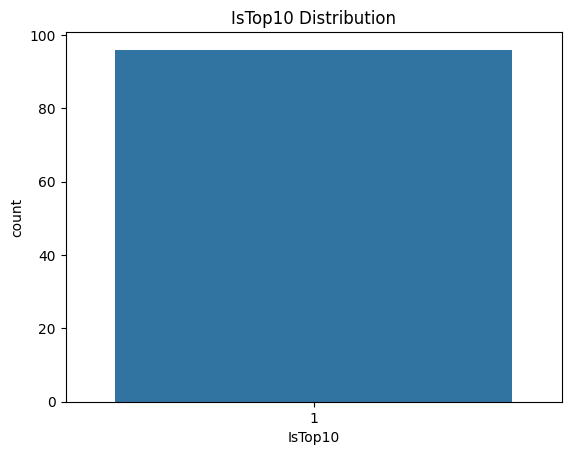

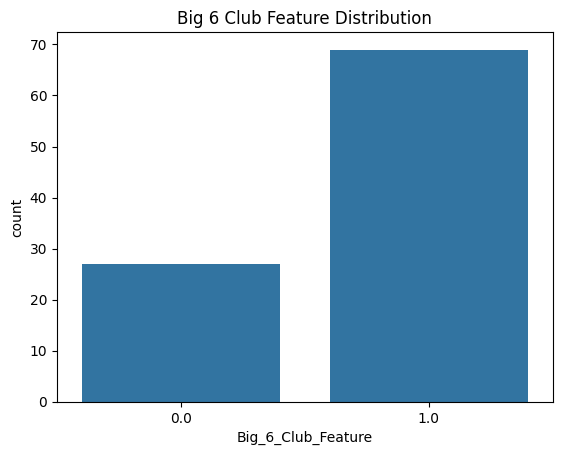

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Position", order=df['Position'].value_counts().index)
plt.title("Players per Position")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x="IsTop10")
plt.title("IsTop10 Distribution")
plt.show()

sns.countplot(data=df, x="Big_6_Club_Feature")
plt.title("Big 6 Club Feature Distribution")
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
X = df.drop(columns=['Assists'])
y = df['Assists']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
linreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

linreg_model.fit(X_train, y_train)
y_pred_lr = linreg_model.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))


NameError: name 'preprocessor' is not defined